In [83]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Задание 1.

In [84]:
df = pd.read_csv('vgsales.csv')
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


## 1.1 Как критики относятся к спортивным играм?

Для ответа на поставленный вопрос, необходимо понять, как можно определить отношение критиков к отдельно взятому жанру.
По моему мнению, вполне достаточно сравнить оценки игр одного жанра со средней оценкой по всем играм.

Тогда основной вопрос будет сформулирован так:

**Критики оценивают игры жанра Sports выше среднего?**

В таком случае гипотезы:

* H0: средняя оценка критиков игр жанра Sports не выше среднего;
* H1: средняя оценка критиков игр жанра Sports выше среднего.

In [85]:
df['Critic_Score'] = df['Critic_Score'].astype('Int64')

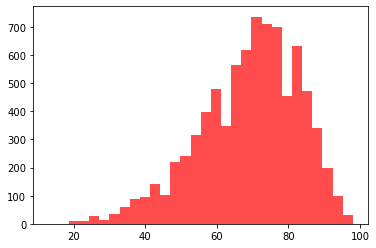

In [86]:
# Распределение оценок критиков для всех игр
plt.hist(df['Critic_Score'].dropna(), color='red', alpha=0.7, bins=30);

In [87]:
print(f"Средняя оценка критиков: {round(df['Critic_Score'].mean())}")

Средняя оценка критиков: 69


In [88]:
import scipy.stats as st

alpha = 0.05
mean_score = df['Critic_Score'].mean()
result = st.ttest_1samp(df[df['Genre'] == 'Sports']['Critic_Score'].dropna(), mean_score, alternative='greater')

print(result)

if result.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу.')
    print('Средняя оценка игр жанра Sports выше среднего.')
else:
    print('Не отвергаем нулевую нулевую гипотезу.')
    print('Средняя оценка игр жанра Sports выше среднего.')

Ttest_1sampResult(statistic=7.470587451672028, pvalue=7.690444376155504e-14)
Отвергаем нулевую гипотезу.
Средняя оценка игр жанра Sports выше среднего.


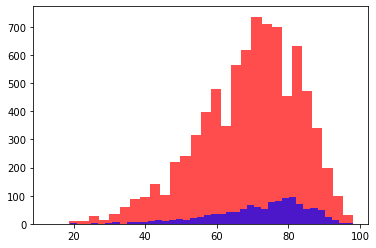

In [89]:
# Сравнение распределений оценок критиков для жанра и для всех игр
plt.hist(df['Critic_Score'].dropna(), color='red', alpha=0.7, bins=30);
plt.hist(df[df['Genre'] == 'Sports']['Critic_Score'].dropna(), color='blue', alpha=0.7, bins=40);

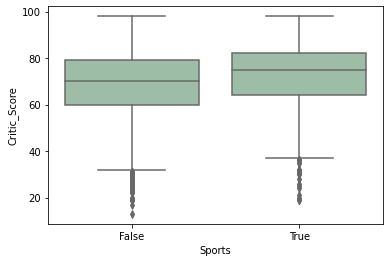

In [90]:
df['Sports'] = df['Genre'] == 'Sports'
                    
ax = sns.boxplot(x='Sports', y='Critic_Score', data=df, color='#99c2a3')
plt.show()

## 1.2 Критикам нравятся больше игры на PC или на PS4?

Для того, чтобы ответить на вопрос "Что критикам нравится больше?", необходимо определить существуют ли различия между оценками критиков, или в среднем они одинаковы.

Тогда вопрос, на который мы будем искать ответ, будет звучать так:

**Существует ли статистические различия между оценками критиков для двух игровых платформ?**

Гипотезы можно сформулировать так:

* H0: средние оценки критиков для платформ PC и PS4 одинаковы;  
* H1: средние оценки критиков для платформ PC и PS4 различаются.

In [91]:
result = st.ttest_ind(df[df['Platform'] == 'PC']['Critic_Score'].dropna(), df[df['Platform'] == 'PC']['Critic_Score'].dropna(), equal_var=False)
print(result)
print('\n')

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу.')
    print('Оценки критиков для рассматриваемых платформ имеют статистические различия.')
else:
    print('Не отвергаем нулевую гипотезу')
    print('Оценки критиков для рассматриваемых платформ не имеют статистических различий.')

Ttest_indResult(statistic=0.0, pvalue=1.0)


Не отвергаем нулевую гипотезу
Оценки критиков для рассматриваемых платформ не имеют статистических различий.


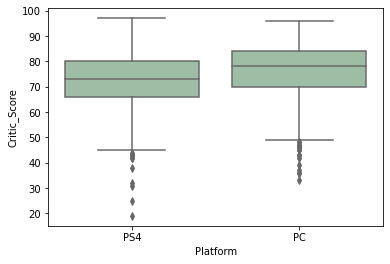

In [92]:
x = df[df['Platform'].isin(['PC', 'PS4'])]['Platform']

ax = sns.boxplot(x=x, y='Critic_Score', data=df, color='#99c2a2')

plt.show() 

## 1.3 Критикам больше нравятся стрелялки или стратегии?

Рассуждая по аналогии с 1.2, переформулируем вопрос и определим нулевую и альтернативную гипотезы.

**Существует ли статистические различия между оценками критиков для двух жанров игр?**

* H0: средние оценки критиков для жанров Shooter и Strategy одинаковы; 
* H1: средние оценки критиков для жанров Shooter и Strategy различаются.

In [93]:
alpha = 0.05
result = st.ttest_ind(df[df['Genre'] == 'Sports']['Critic_Score'].dropna(), df[df['Genre'] == 'Strategy']['Critic_Score'].dropna(), equal_var=False)
print(result)
print('\n')

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
    print('Оценки критиков для рассматриваемых жанров имеют статистические различия.')
else:
    print('Не отвергаем нулевую гипотезу.')
    print('Оценки критиков для рассматриваемых жанров не имеют статистических различий.')

Ttest_indResult(statistic=-0.14920380385728488, pvalue=0.881449481097373)


Не отвергаем нулевую гипотезу.
Оценки критиков для рассматриваемых жанров не имеют статистических различий.


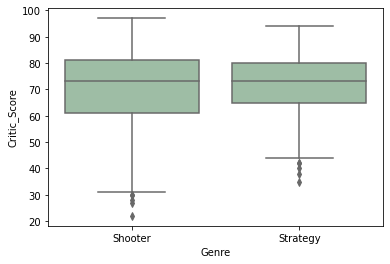

In [94]:
x = df[df['Genre'].isin(['Strategy', 'Shooter'])]['Genre']

ax = sns.boxplot(x=x, y='Critic_Score', data=df, color='#99c2a2')

plt.show()

## Задание 2.

In [95]:
df = pd.read_csv('spam.csv')
data = df.copy(deep=True)

pd.set_option('max_colwidth', 120)
pd.set_option('display.width', 500)

df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std t...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"
...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 ..."
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other suggestions?"
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us...


### Подготовим данные.

TfidfVectorizer по умолчанию приводит текст к нижнему регистру, берёт слова и числа из двух знаков и более (игнорируя знаки препинания) и, при stop_words='english', уберёт стоп-слова. Поэтому, перед созданием матрицы векторов, считаю достаточным привести исходный текст к леммам.



In [96]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
df['Message'] = [' '.join([wordnet_lemmatizer.lemmatize(word) for word in row.split()]) for row in df['Message'].tolist()]

# добавим столбец Class, как зависимую переменную, которую будем прогнозировать
df['Class'] = 0
df.loc[df['Category'] == 'spam', 'Class'] = 1
df

,Category,Message,Class
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std t...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he go to usf, he life around here though",0
...,...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 ...",1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * wa in mood for that. So...any other suggestions?",0
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to u ...,0


### Создание матрицы векторов.

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)

tfidf_matrix = pd.concat([df['Class'], tfidf_matrix], axis=1, sort=False)
tfidf_matrix

,Class,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Построение модели.

In [98]:
df_to_learn = tfidf_matrix.loc[:, tfidf_matrix.columns != 'Class']

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_to_learn, tfidf_matrix.Class, test_size=0.30, random_state=42)

In [100]:
X_train.shape

(3900, 8234)

In [101]:
y_train.shape

(3900,)

In [102]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [103]:
lr.fit(X_train, y_train)

LogisticRegression()

In [104]:
y_pred = lr.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

### Матрица ошибок.

In [105]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[1447,    1],
       [  72,  152]])

In [106]:
from sklearn.metrics import classification_report

target_names = ['ham', 'spam']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1448
        spam       0.99      0.68      0.81       224

    accuracy                           0.96      1672
   macro avg       0.97      0.84      0.89      1672
weighted avg       0.96      0.96      0.95      1672



## DATAFRAME

In [107]:
data['Class'] = 0
data.loc[data['Category'] == 'spam', 'Class'] = 1

df_predict = pd.DataFrame(y_pred)

df_result = data.join(df_predict, how='right').rename(columns={0: 'Predict'})
df_result = df_result.loc[df_result['Class'] != df_result['Predict']]

df_result

,Category,Message,Class,Predict
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std t...,1,0
5,spam,FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX...,1,0
8,spam,WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 0906170146...,1,0
9,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call Th...,1,0
11,spam,"SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs a...",1,0
...,...,...,...,...
1658,ham,S:-)if we have one good partnership going we will take lead:),0,1
1659,spam,RGENT! This is the 2nd attempt to contact U!U have WON £1250 CALL 09071512433 b4 050703 T&CsBCM4235WC1N3XX. callcost...,1,0
1663,spam,Hi if ur lookin 4 saucy daytime fun wiv busty married woman Am free all next week Chat now 2 sort time 09099726429 J...,1,0
1668,ham,So now my dad is gonna call after he gets out of work and ask all these crazy questions.,0,1


In [108]:
# сколько по факту убрали спам сообщений к общему числу спама в тестовой выборке
1 - (df_result['Category'].value_counts().loc['spam'] / df['Category'].value_counts().loc['spam'])

0.7081659973226238